In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#mouse_metadata.head(1)
#study_results.head(1)
mouse_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_df.head(1)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = mouse_df.groupby("Drug Regimen").describe()
summary_df.head(4)

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  

[4 rows x 40 columns]

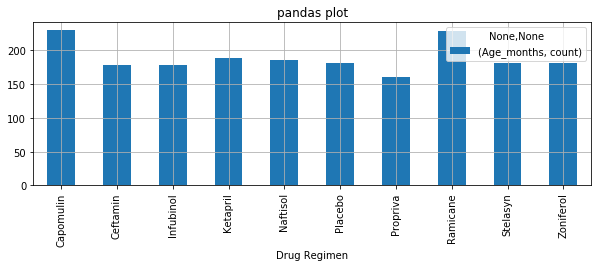

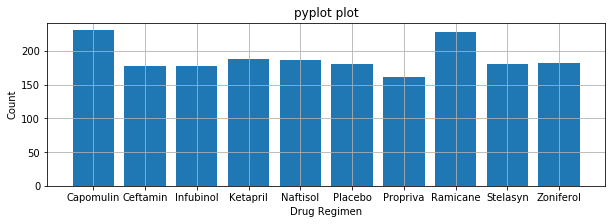

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

summary_df.plot(kind = "bar",y=('Age_months','count'),figsize=(10,3),grid=True,title="pandas plot")

# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_count = mouse_df["Drug Regimen"].value_counts()
drug_count.sort_index(ascending = True,inplace = True)

plt.figure(figsize=(10,3))
plt.title("pyplot plot")
plt.grid()
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.bar(drug_count.index,drug_count)

plt.show()

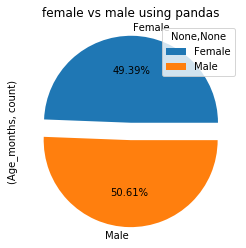

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mouse_df.groupby("Sex").describe()
sex_df.plot(kind="pie",y=[('Age_months','count')],explode=[0.1,0.1],autopct='%.2f%%',title="female vs male using pandas")

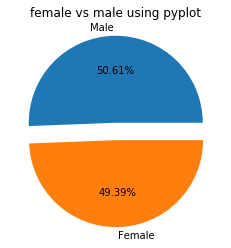

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = mouse_df["Sex"].value_counts()
plt.title("female vs male using pyplot")
plt.pie(sex_data,explode=[.1,.1],labels=sex_data.index,autopct='%.2f%%')
plt.show()

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
promisingDrugs_df = summary_df.sort_values(("Tumor Volume (mm3)","max"),ascending=False)
promisingDrugs_df = promisingDrugs_df.head(4)
promisingDrugs_df
finalTumorDF = mouse_df.set_index('Drug Regimen').loc[["Ketapril","Naftisol","Stelasyn","Zoniferol"],["Mouse ID","Tumor Volume (mm3)"]]
print(finalTumorDF)
quartiles = finalTumorDF.quantile([.25,.5,.75])
quartiles = quartiles.reset_index()
lowerq = quartiles['Tumor Volume (mm3)'][0]
upperq = quartiles['Tumor Volume (mm3)'][2]
iqr = upperq - lowerq
lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
outliers = finalTumorDF.loc[finalTumorDF['Tumor Volume (mm3)'] <lowerbound]
outliers = pd.merge(outliers, finalTumorDF.loc[finalTumorDF['Tumor Volume (mm3)']>upperbound],how='outer')
outliers


             Mouse ID  Tumor Volume (mm3)
Drug Regimen                             
Ketapril         a457           45.000000
Ketapril         a457           47.462891
Ketapril         a457           49.783419
Ketapril         c580           45.000000
Ketapril         c580           46.628455
...               ...                 ...
Zoniferol        w575           68.401286
Zoniferol        x613           45.000000
Zoniferol        x613           46.097041
Zoniferol        x613           46.818176
Zoniferol        x613           48.077646

[737 rows x 2 columns]


Mouse ID  Tumor Volume (mm3)
0     o331           78.567014

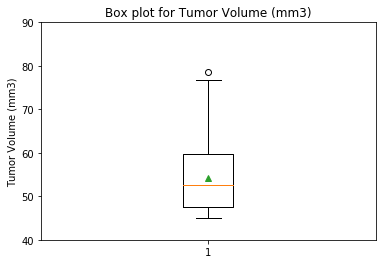

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.ylim(40,90)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Box plot for Tumor Volume (mm3)")
plt.boxplot(finalTumorDF["Tumor Volume (mm3)"],showmeans = True)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1440x1440 with 0 Axes>

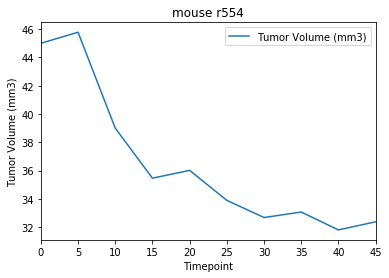

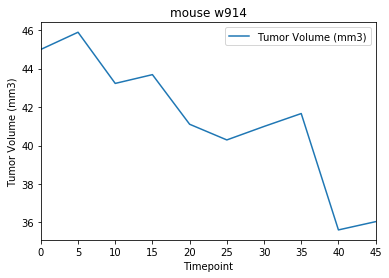

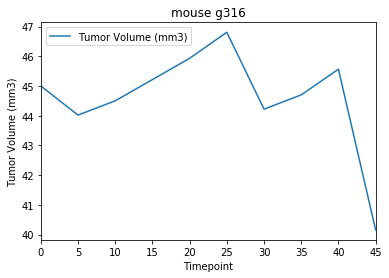

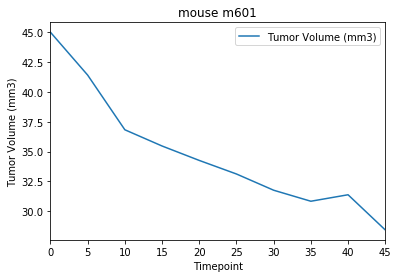

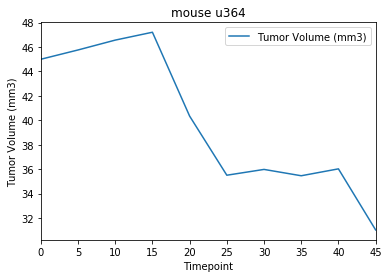

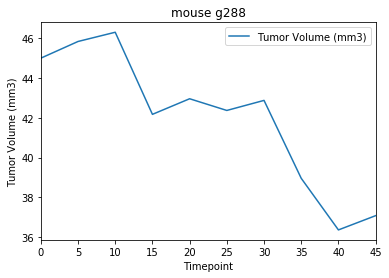

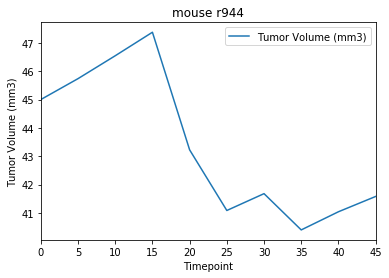

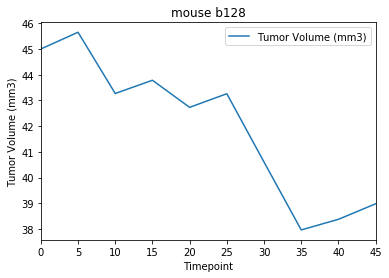

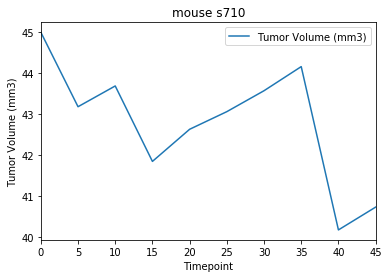

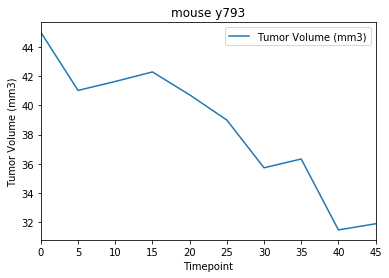

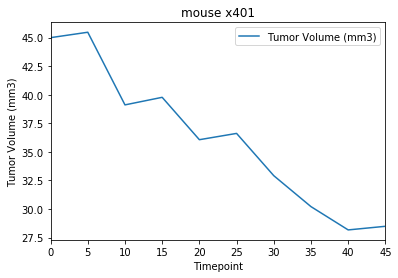

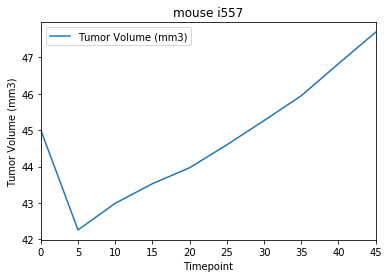

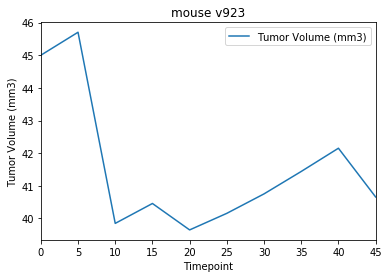

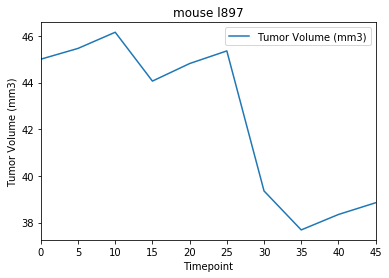

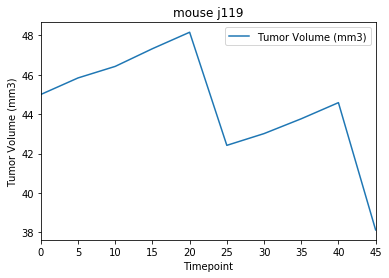

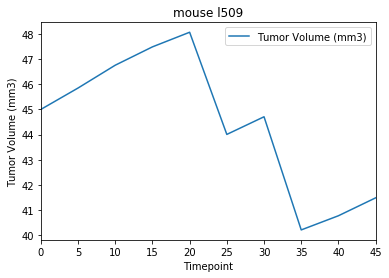

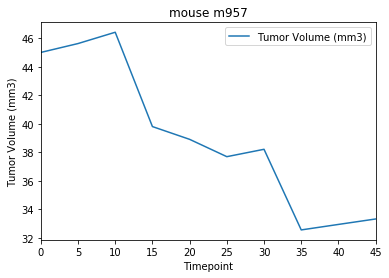

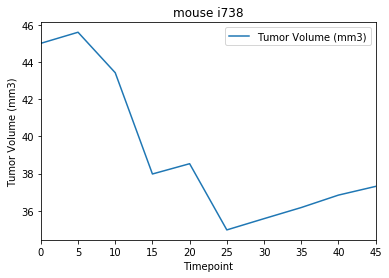

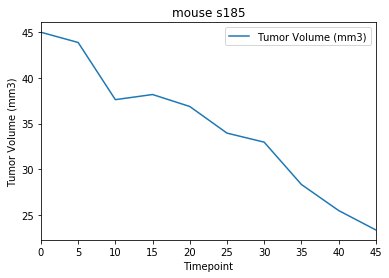

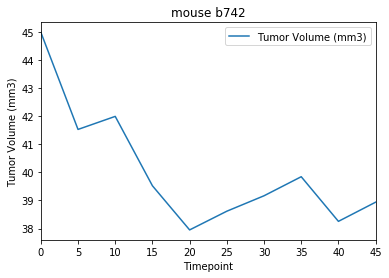

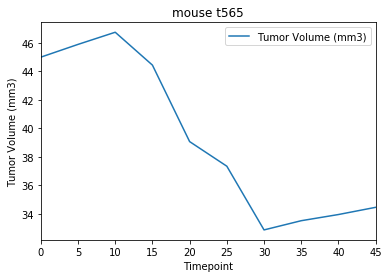

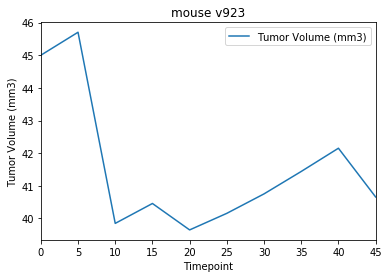

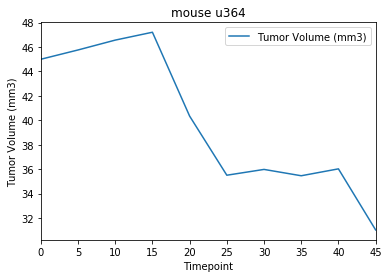

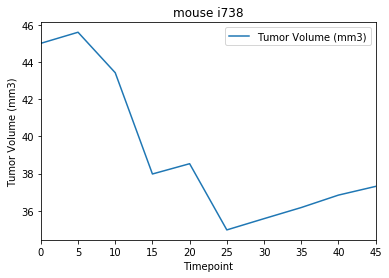

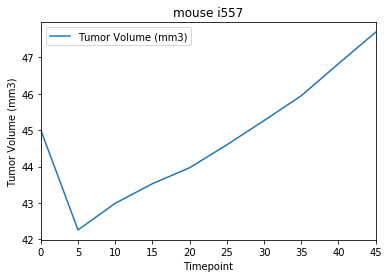

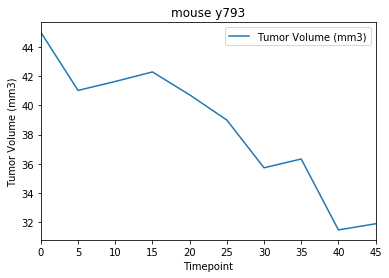

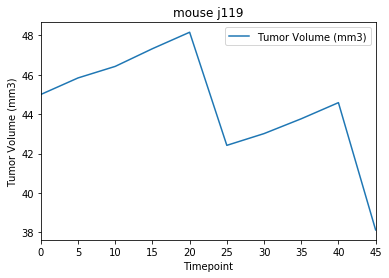

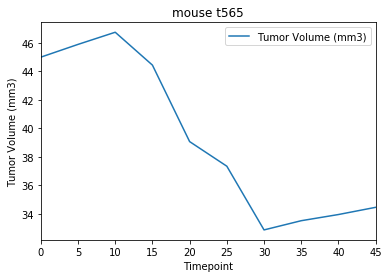

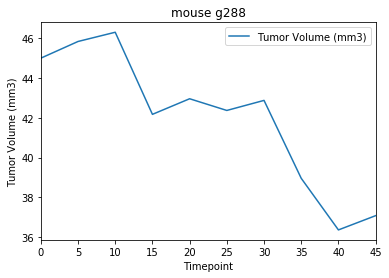

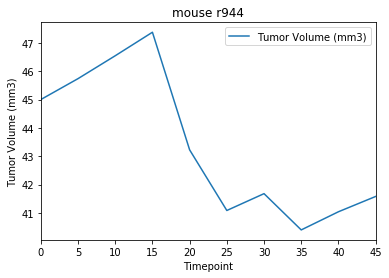

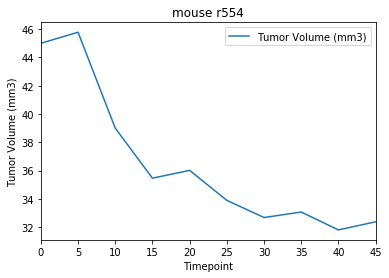

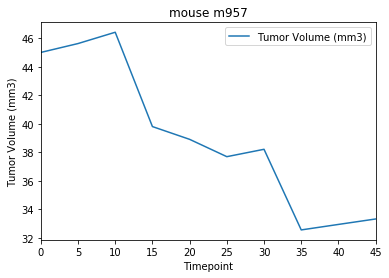

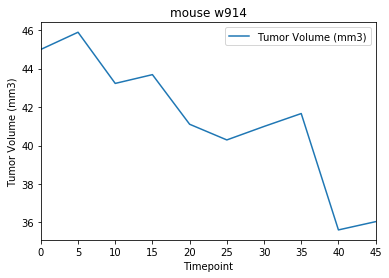

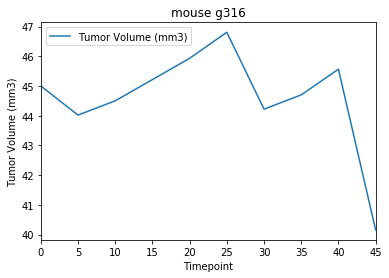

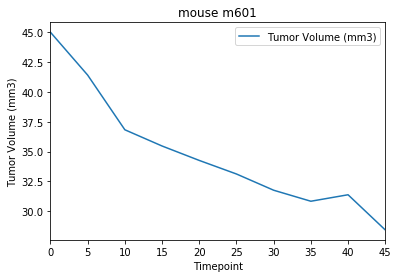

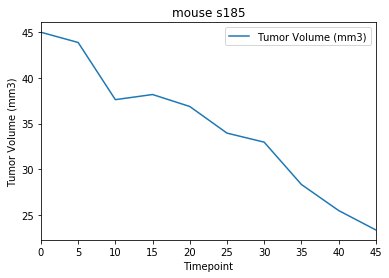

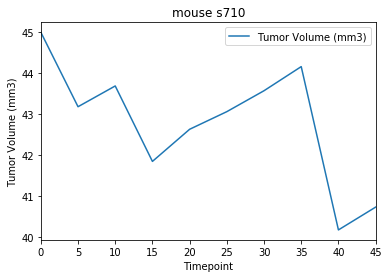

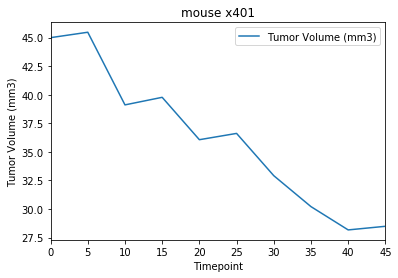

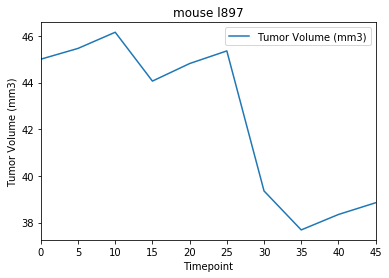

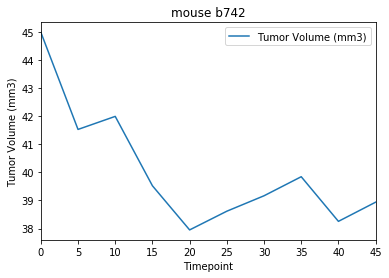

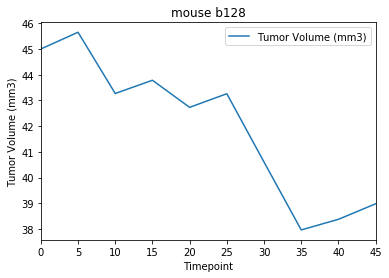

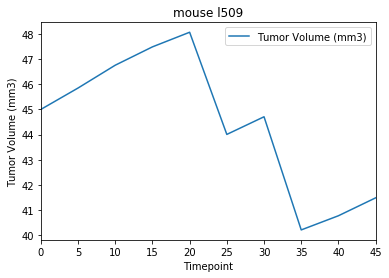

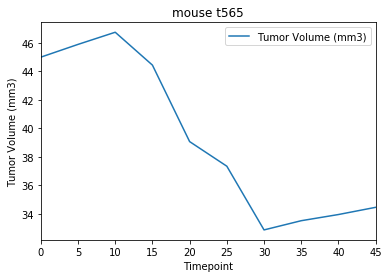

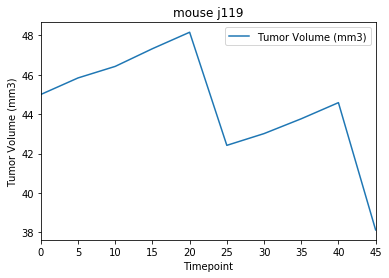

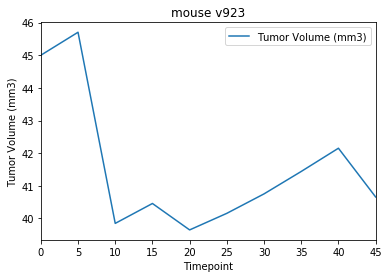

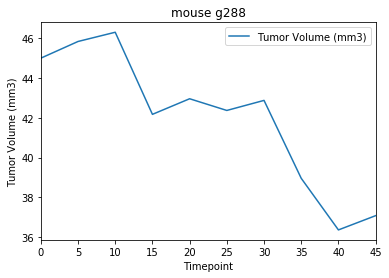

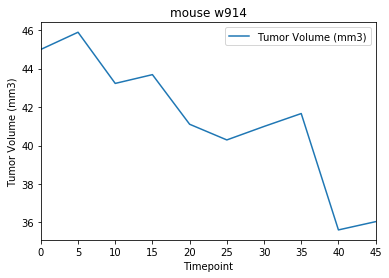

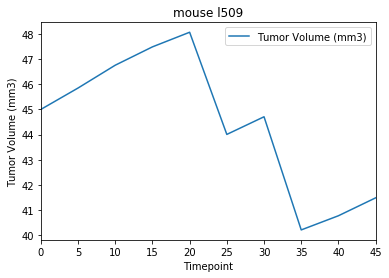

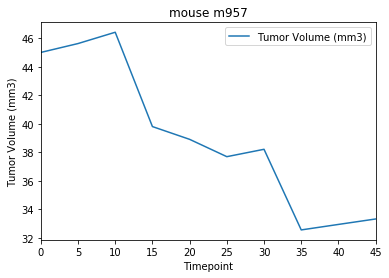

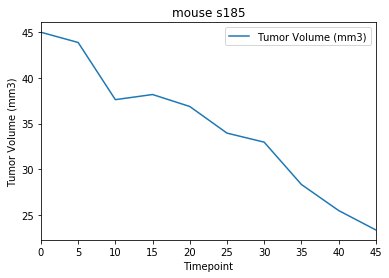

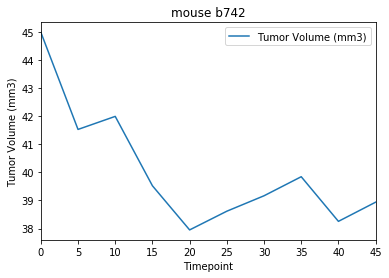

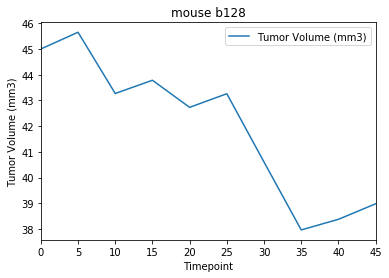

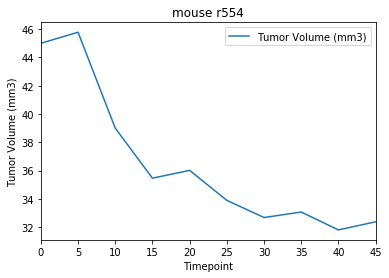

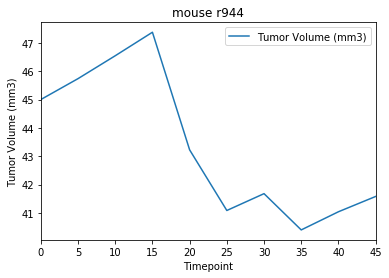

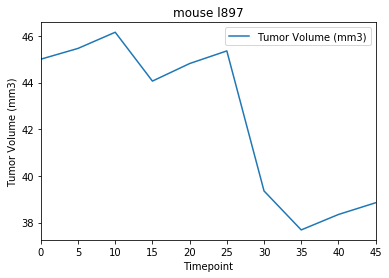

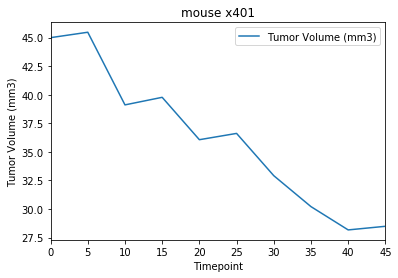

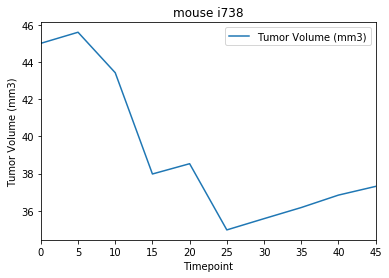

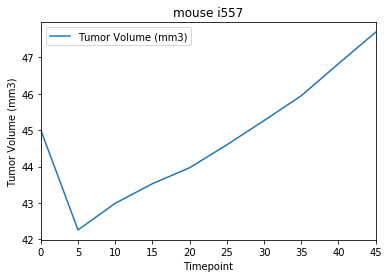

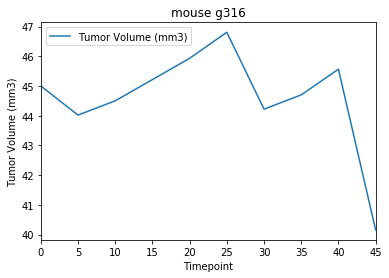

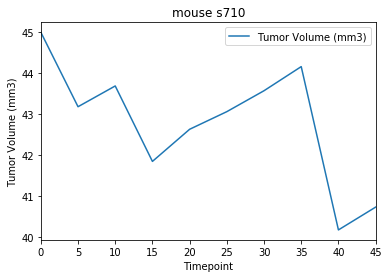

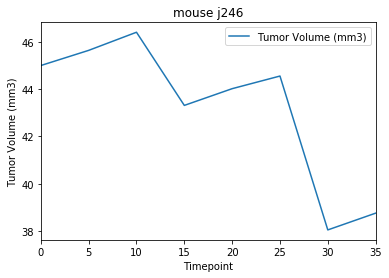

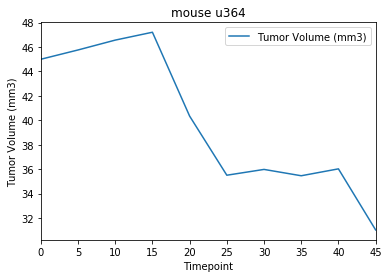

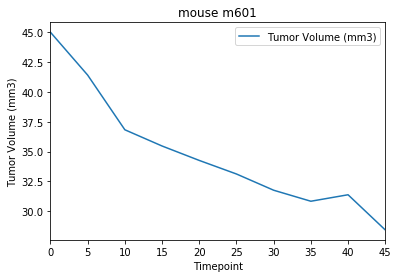

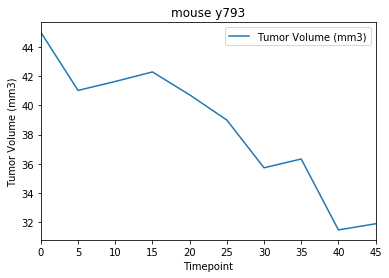

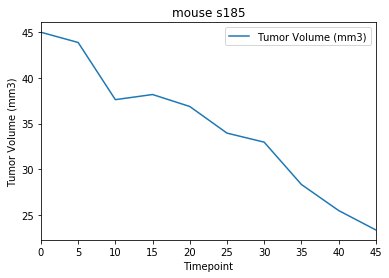

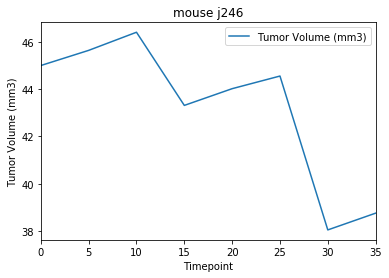

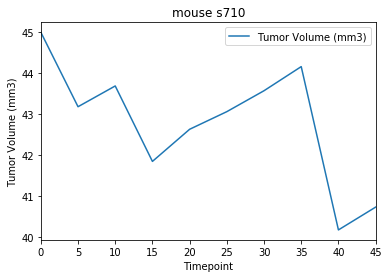

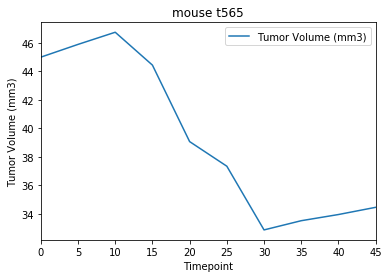

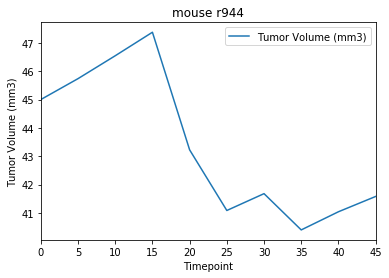

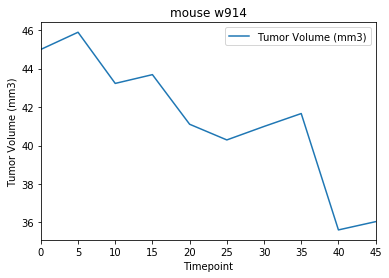

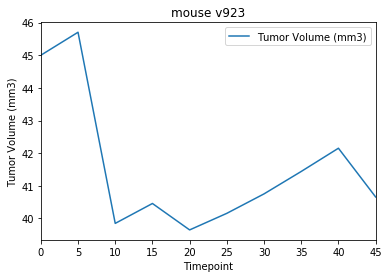

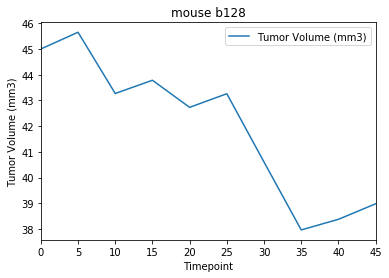

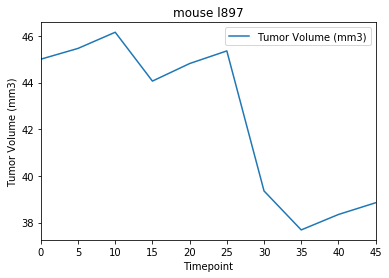

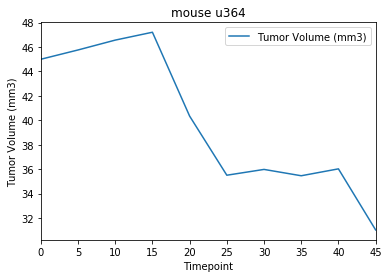

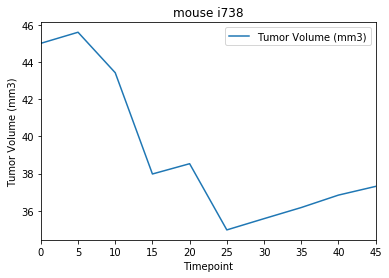

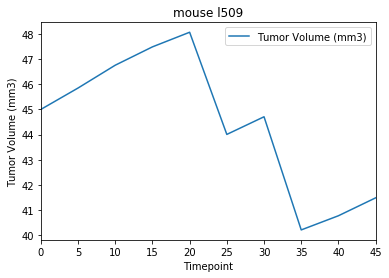

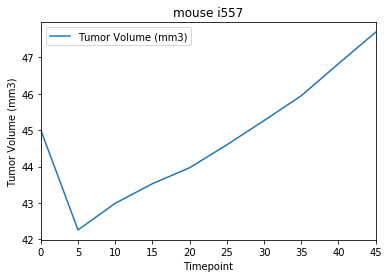

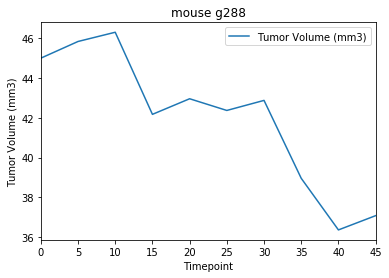

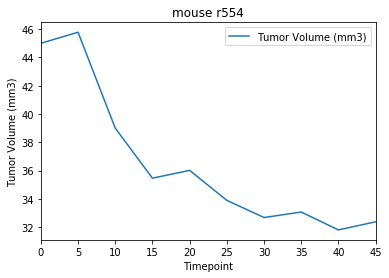

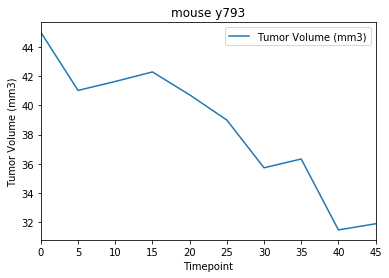

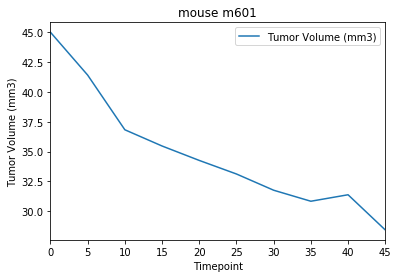

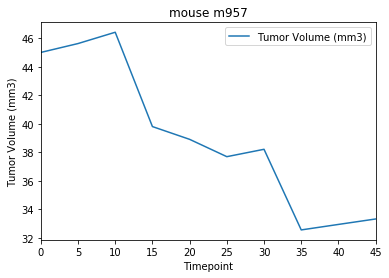

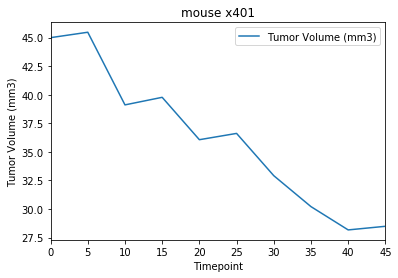

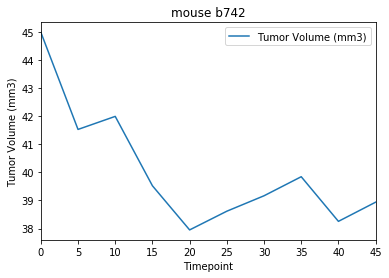

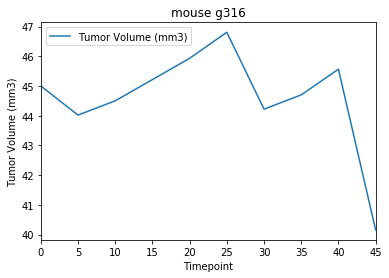

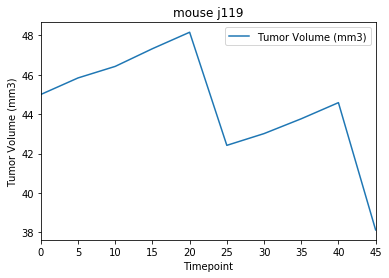

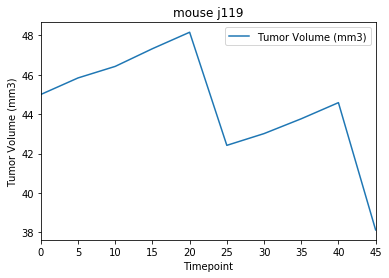

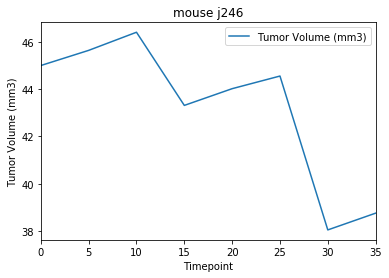

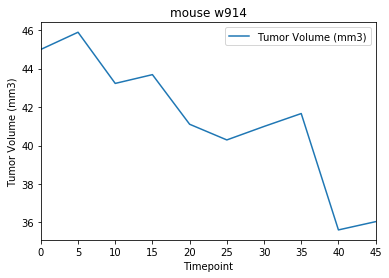

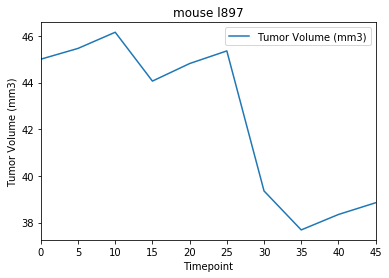

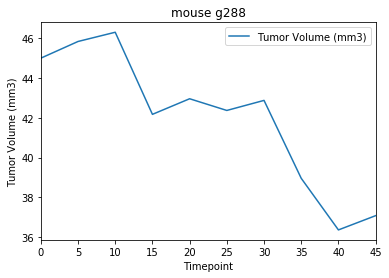

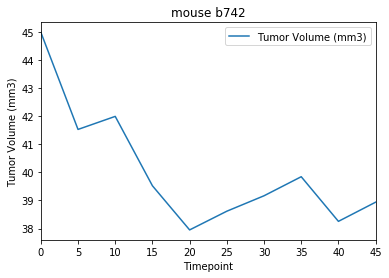

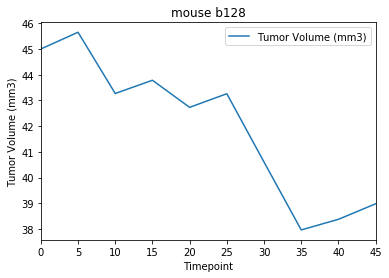

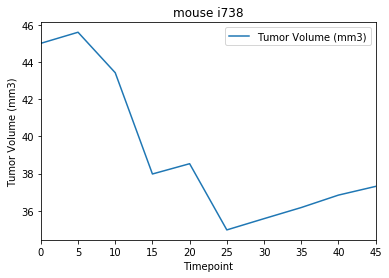

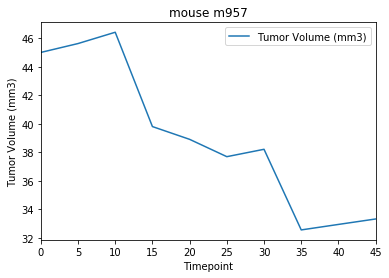

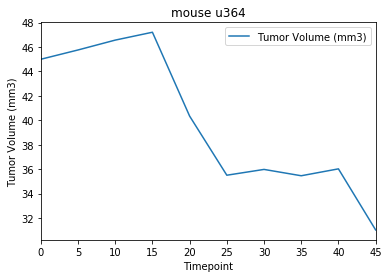

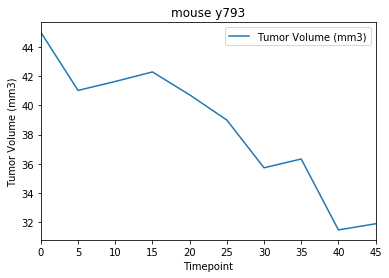

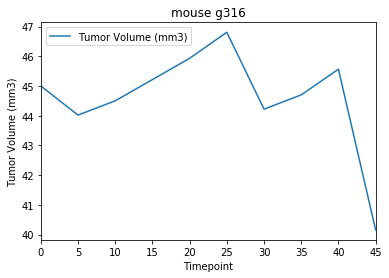

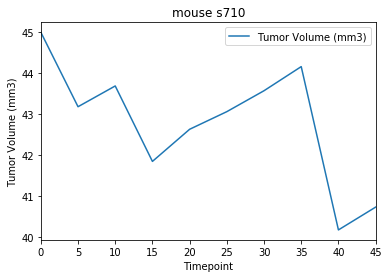

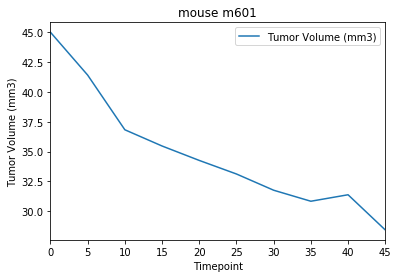

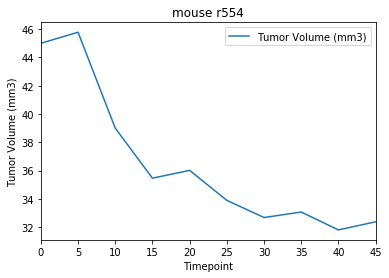

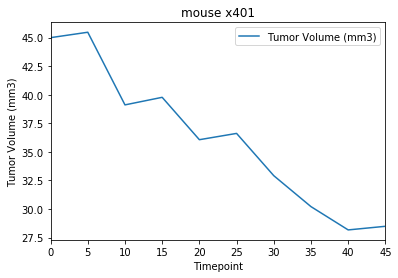

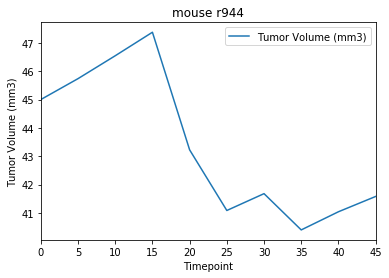

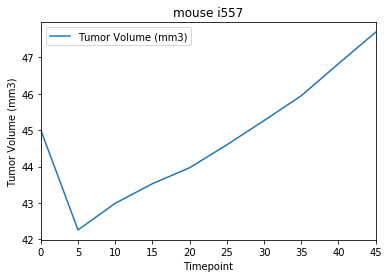

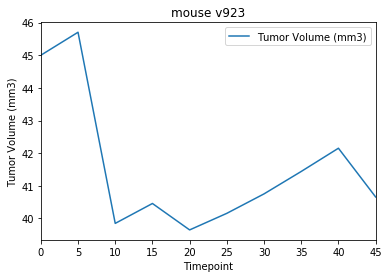

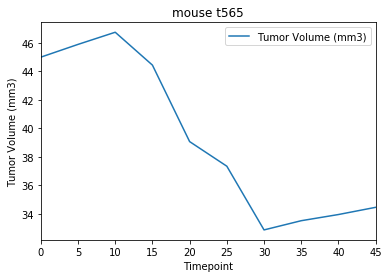

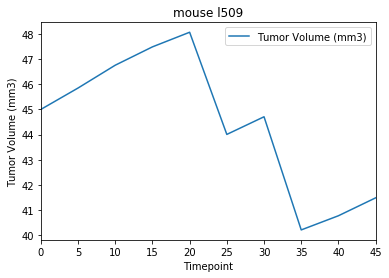

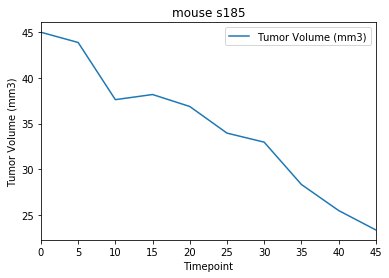

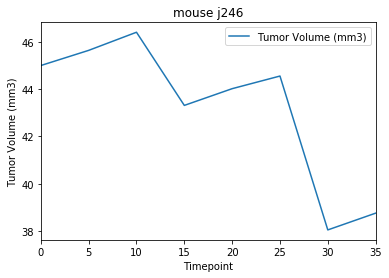

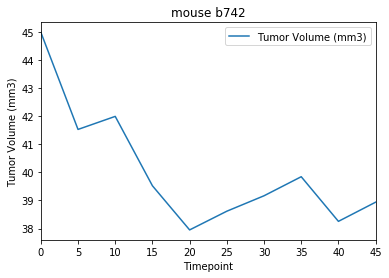

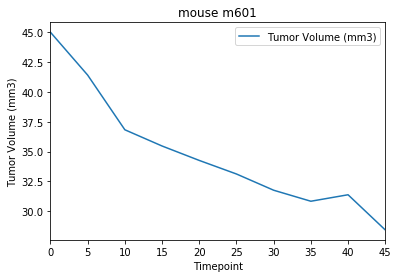

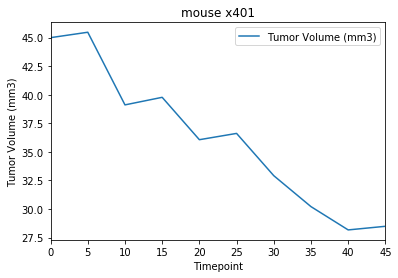

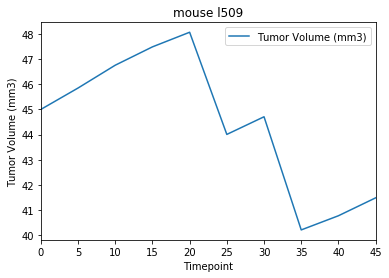

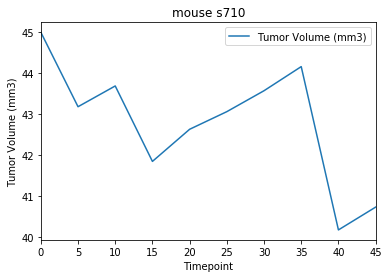

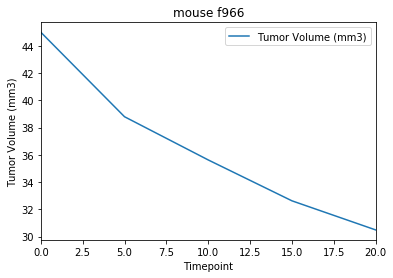

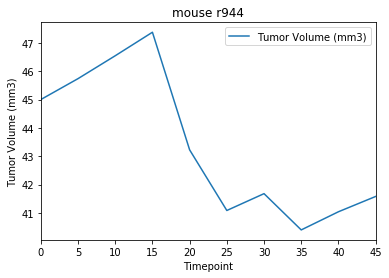

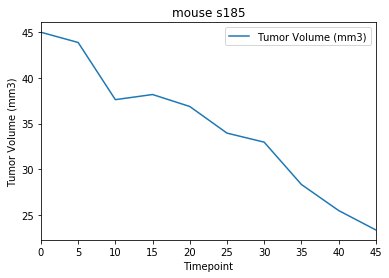

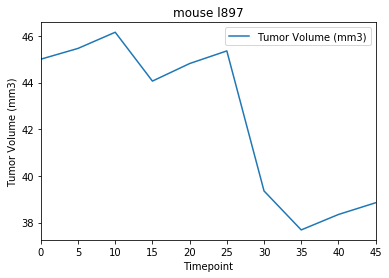

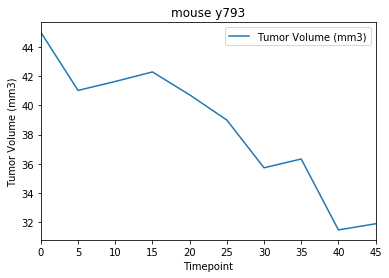

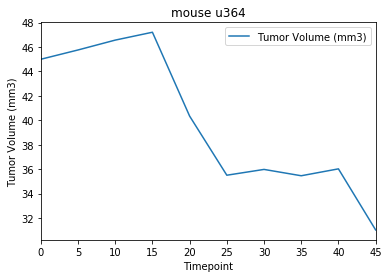

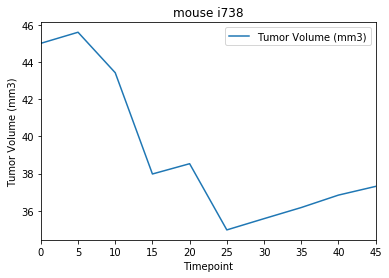

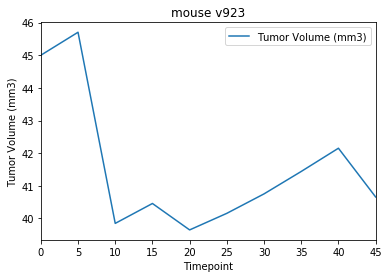

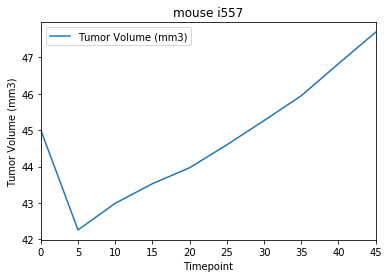

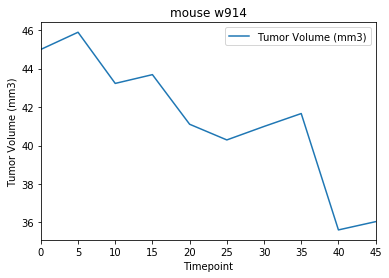

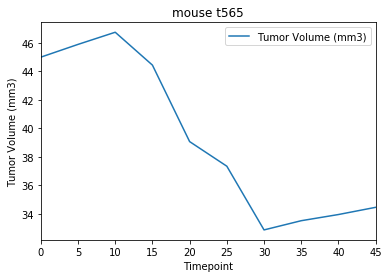

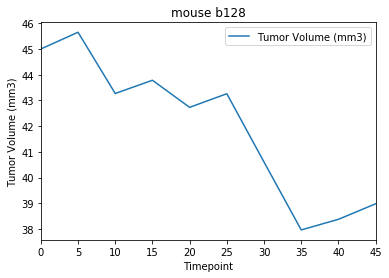

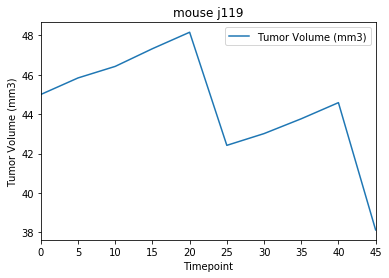

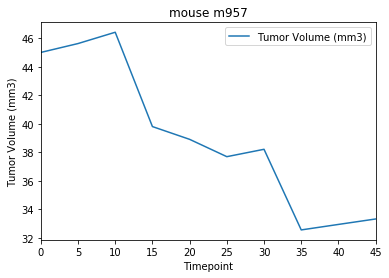

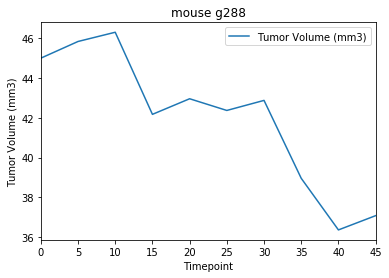

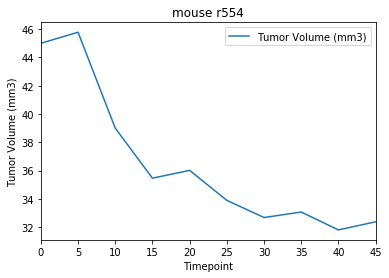

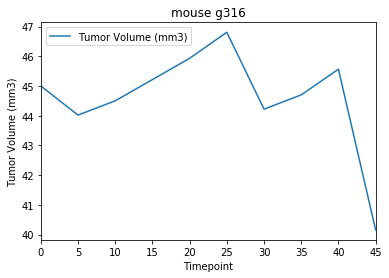

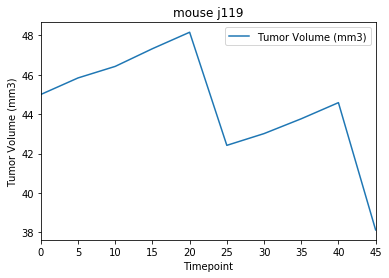

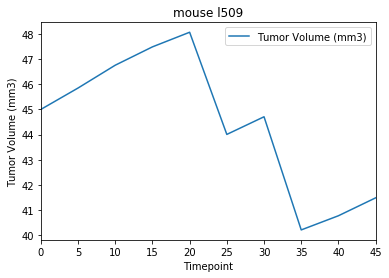

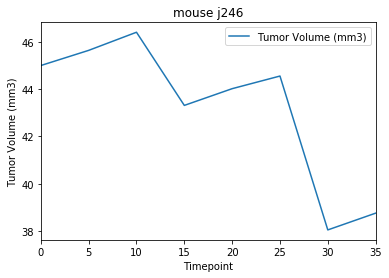

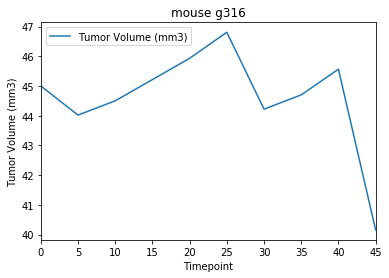

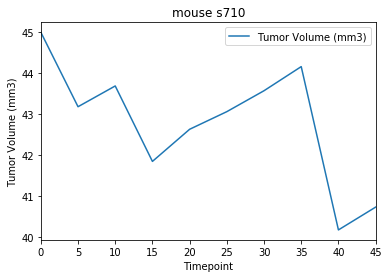

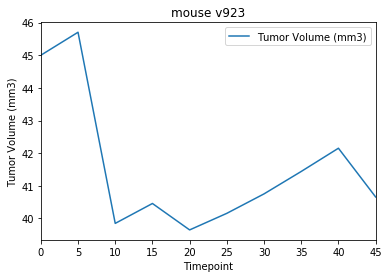

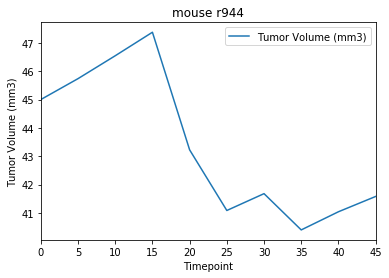

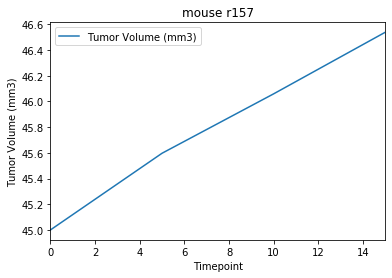

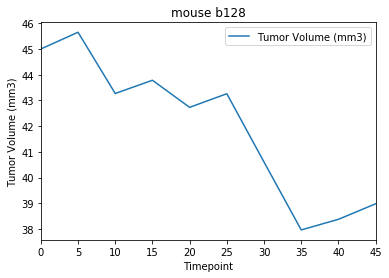

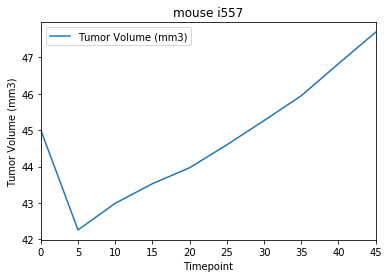

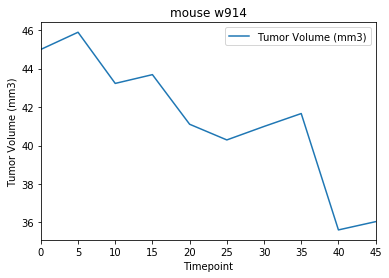

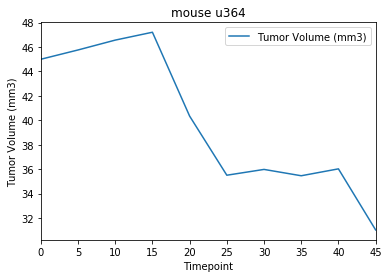

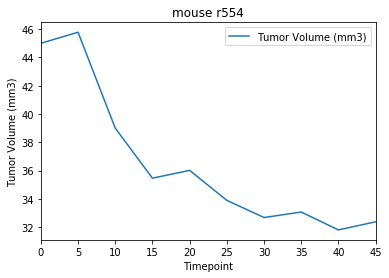

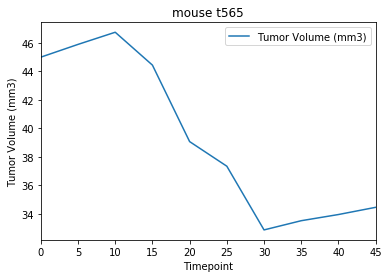

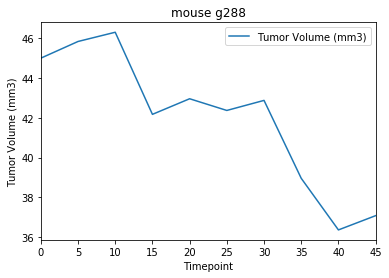

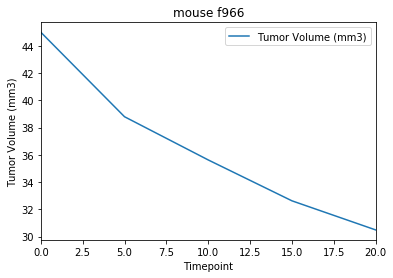

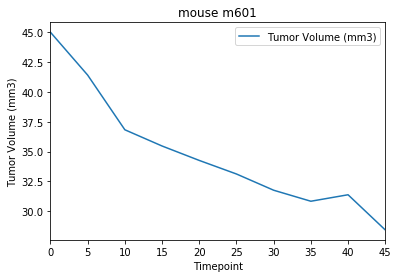

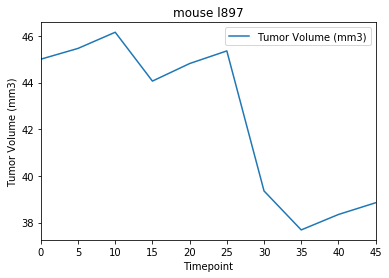

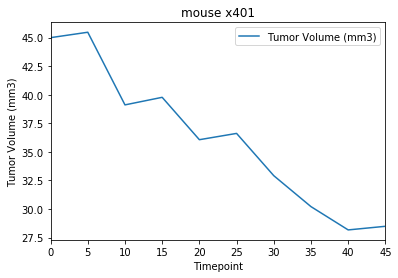

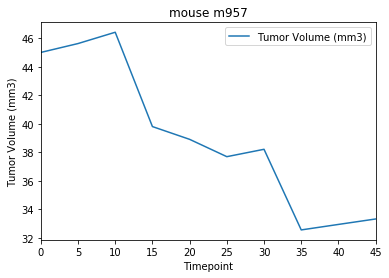

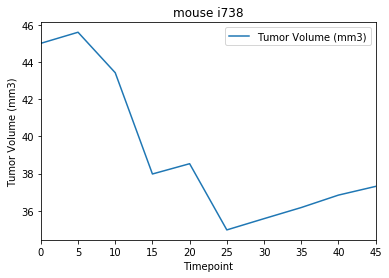

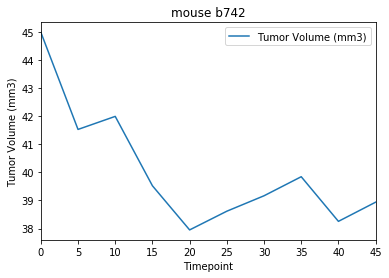

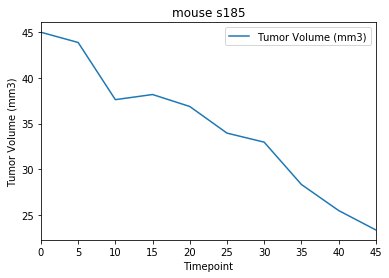

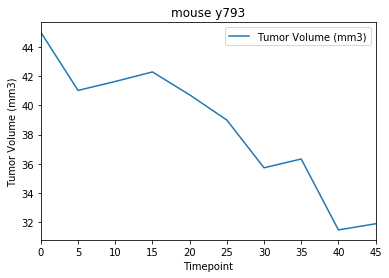

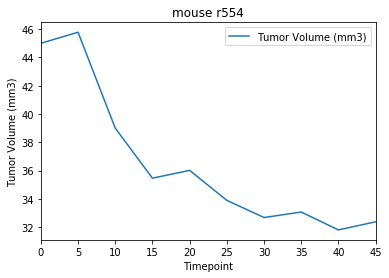

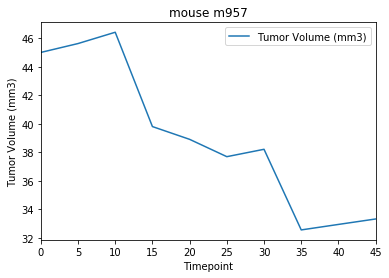

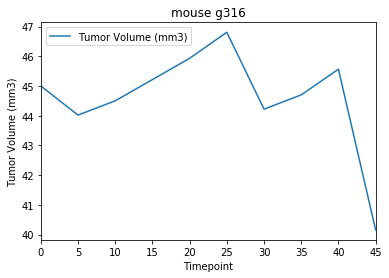

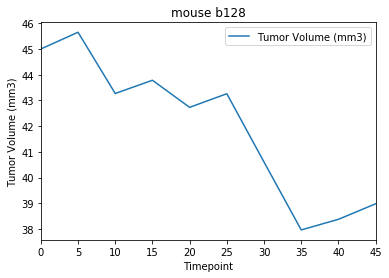

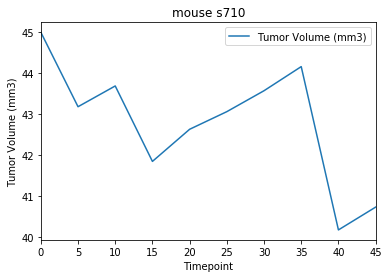

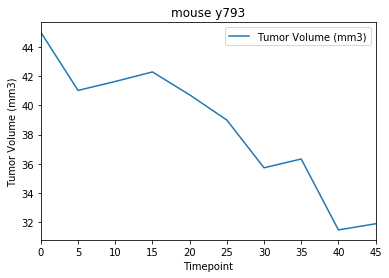

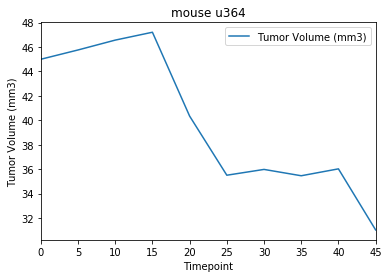

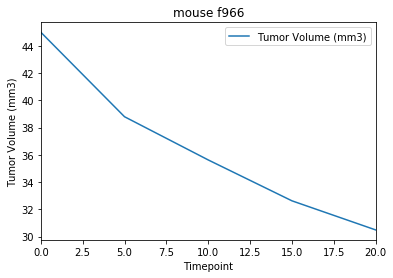

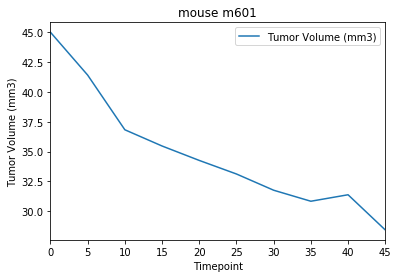

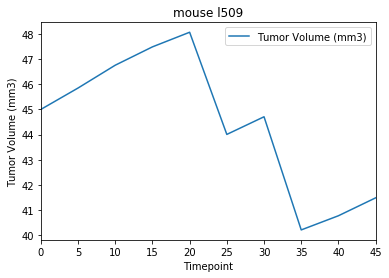

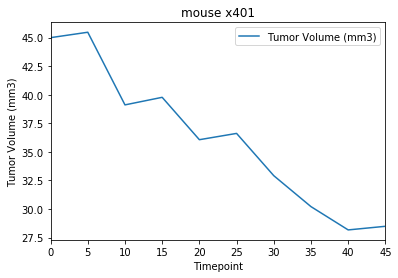

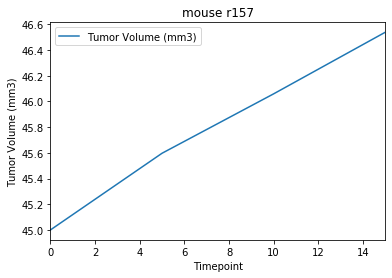

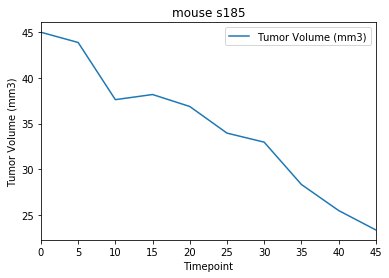

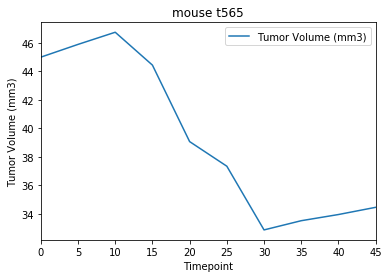

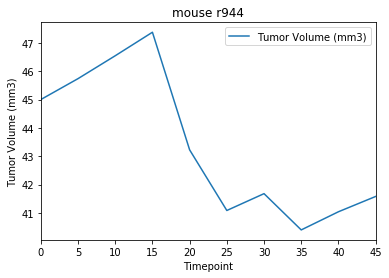

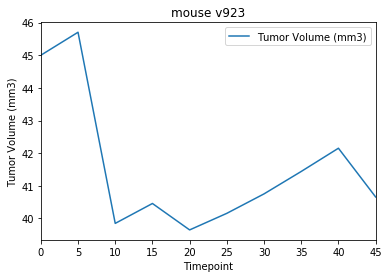

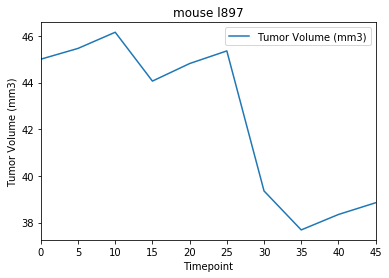

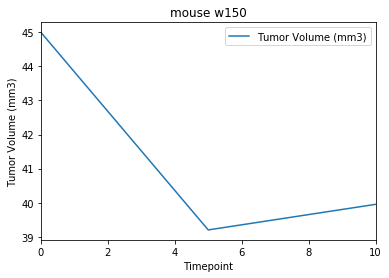

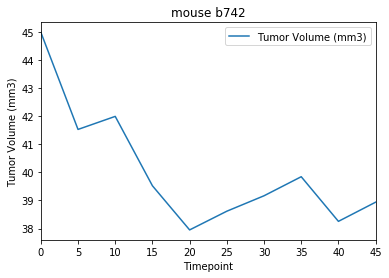

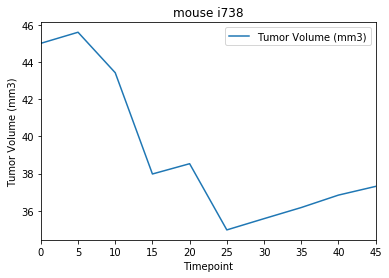

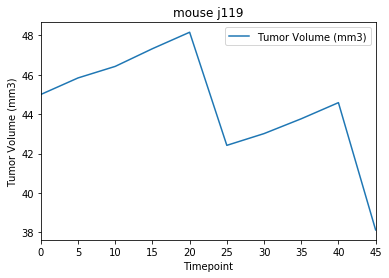

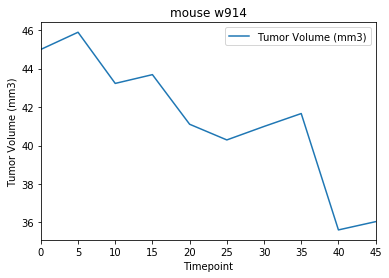

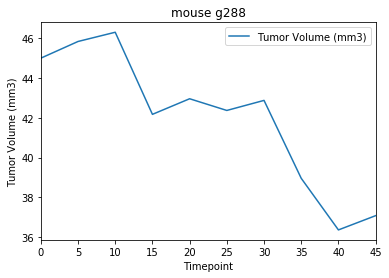

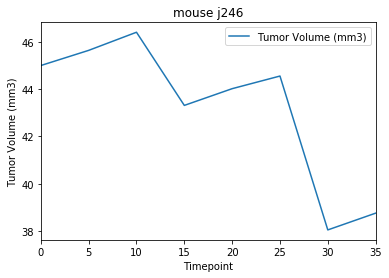

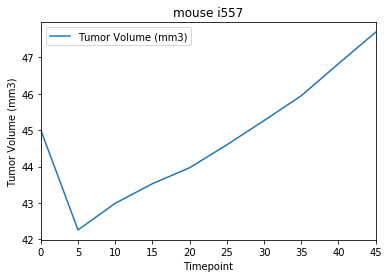

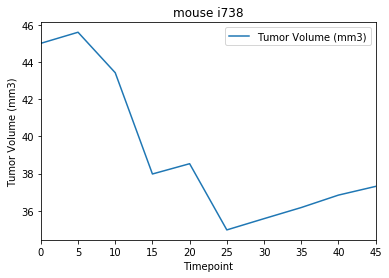

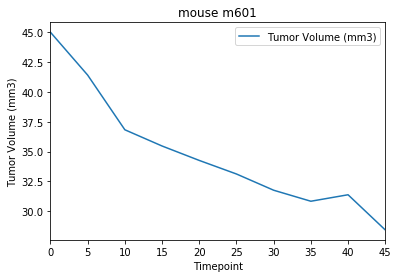

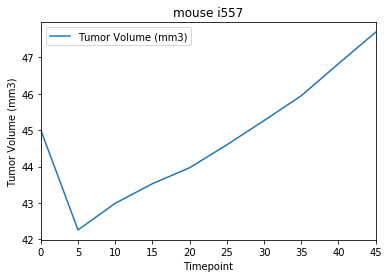

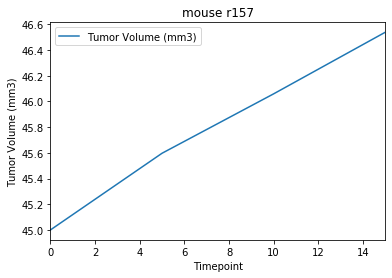

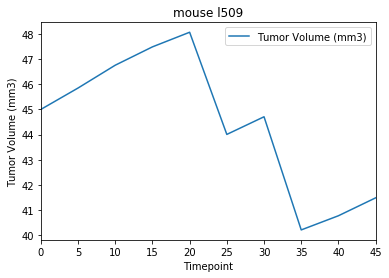

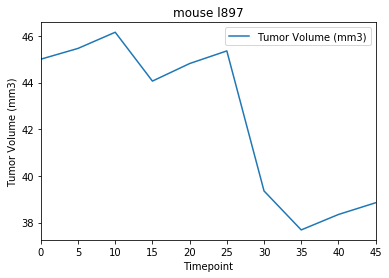

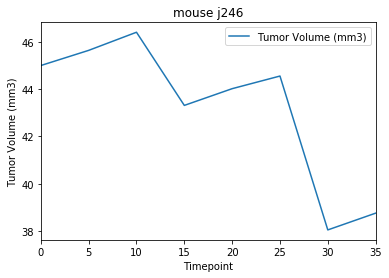

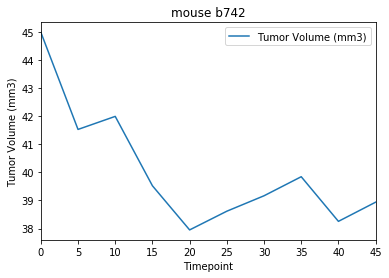

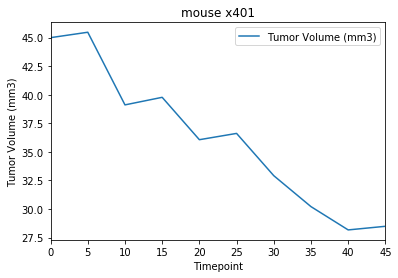

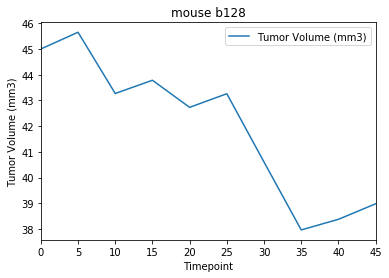

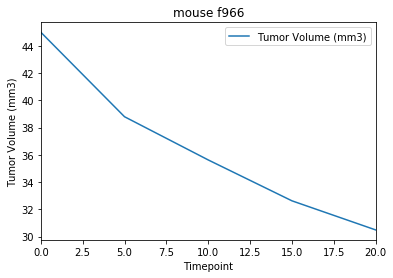

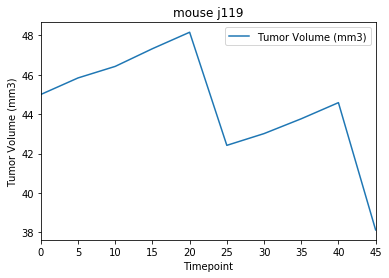

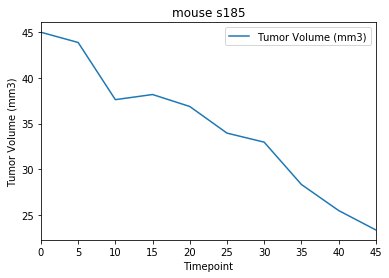

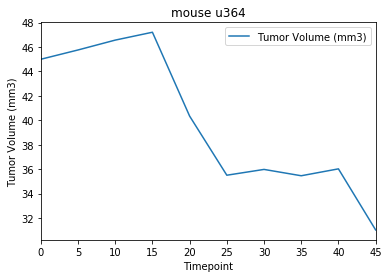

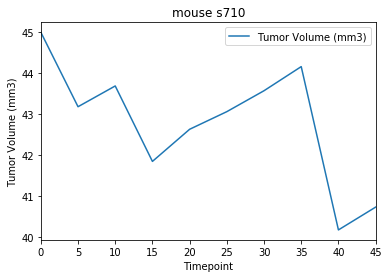

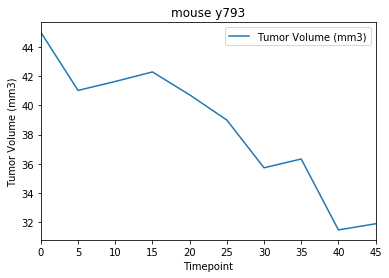

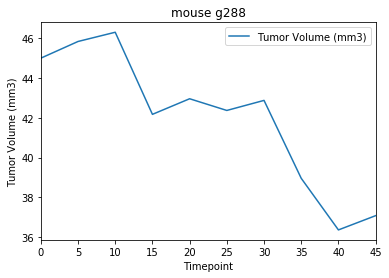

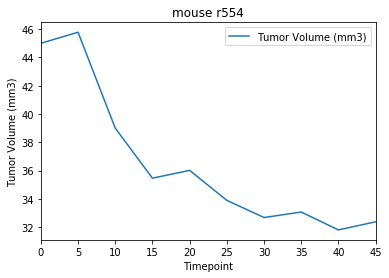

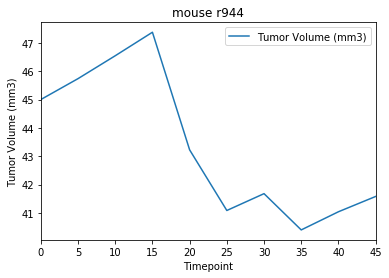

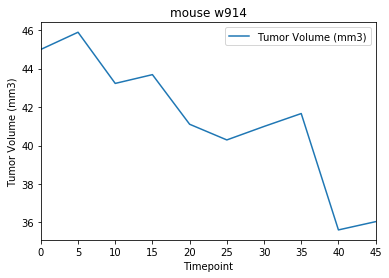

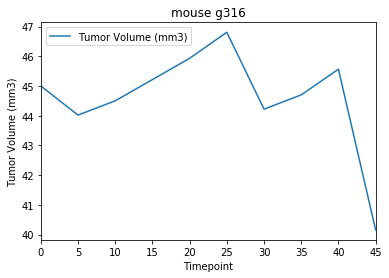

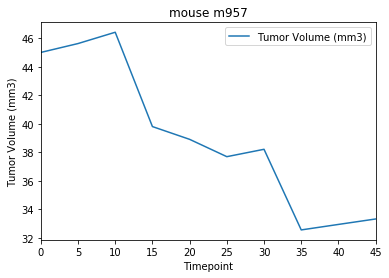

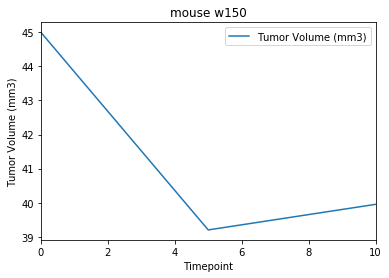

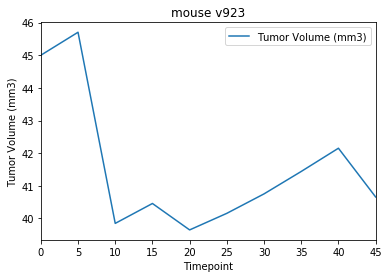

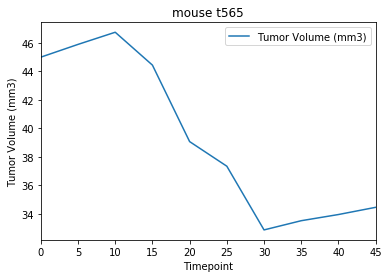

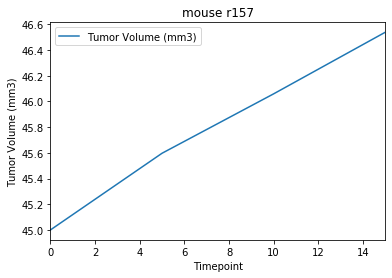

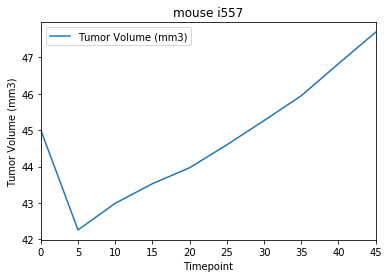

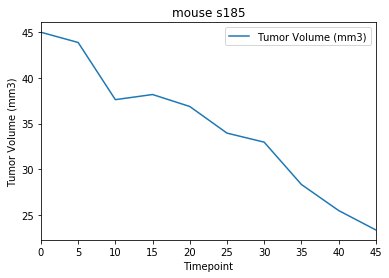

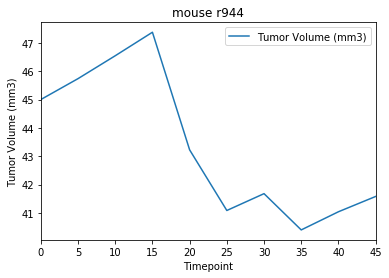

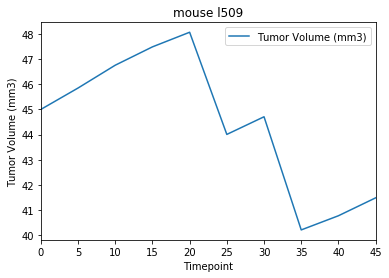

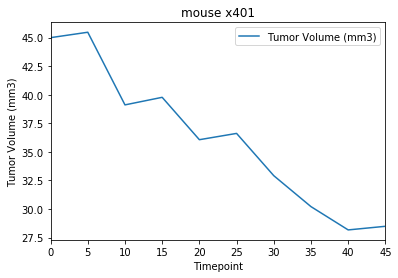

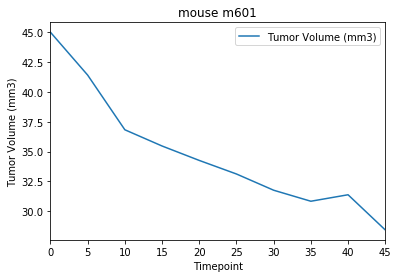

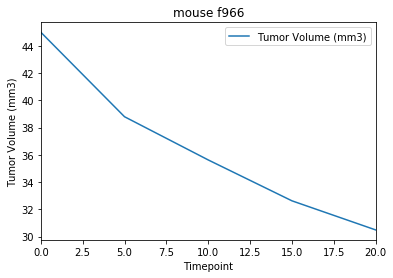

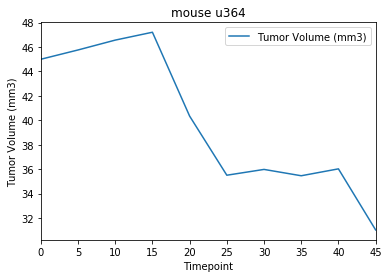

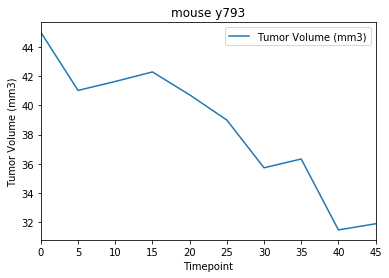

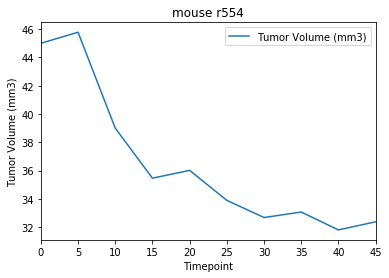

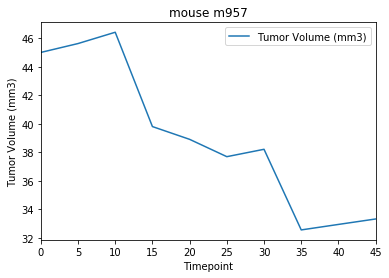

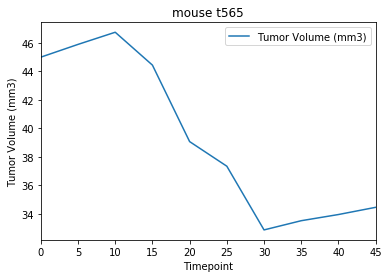

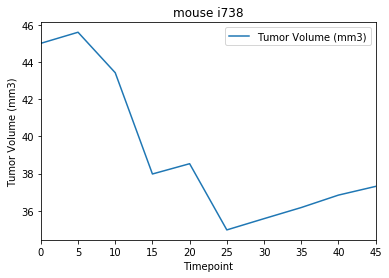

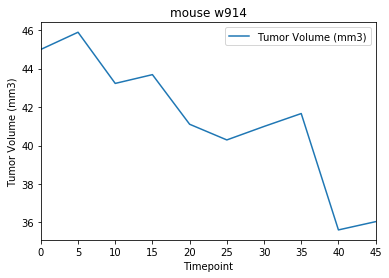

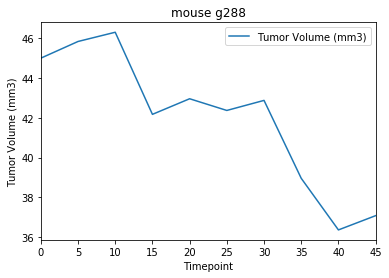

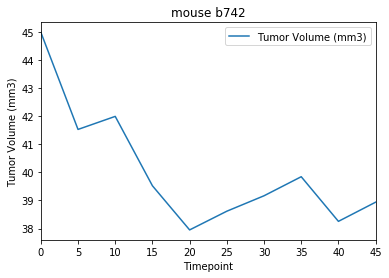

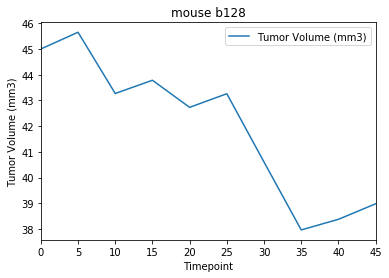

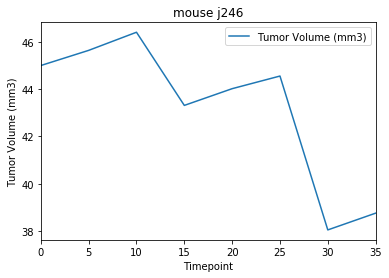

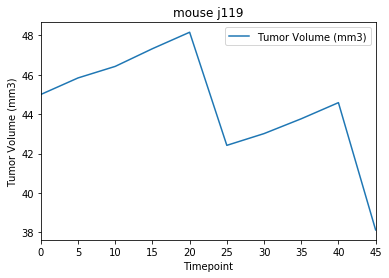

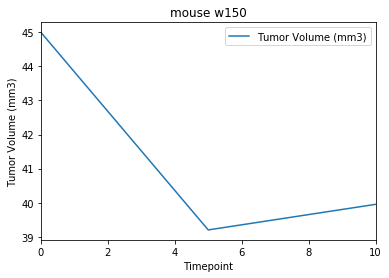

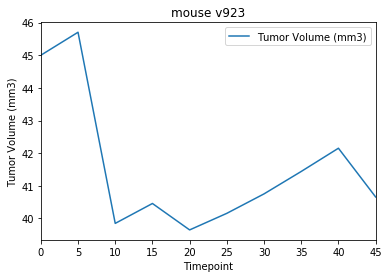

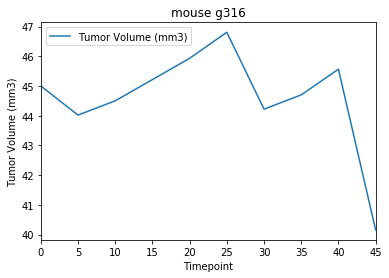

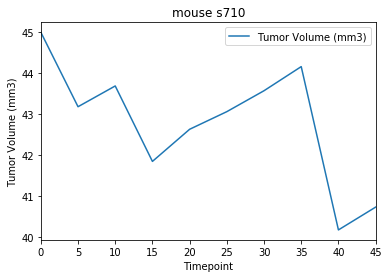

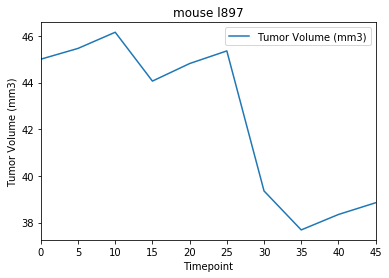

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# plt.figure(figsize=(5,5))
# plt.xlim()
capomulinDF = mouse_df.loc[mouse_df["Drug Regimen"]=="Capomulin",["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
capomulinDF.sort_values("Timepoint",ascending=False,inplace=True)
capomulinDF.head(1)
plt.figure(figsize=(20,20))
for mouse in capomulinDF["Mouse ID"]: #didn't specify which mouse so you get all of them :)
    mouseDF = capomulinDF.loc[capomulinDF["Mouse ID"] == mouse,["Timepoint","Tumor Volume (mm3)"]]
    mouseDF.sort_values("Timepoint",ascending=False,inplace=True)
    mouseDF.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)")
    plt.title(f'mouse {mouse}')
    plt.ylabel("Tumor Volume (mm3)")
plt.show()

Line EQ = 0.9544396890241045*x + 21.552160532685015
Pearson's Coefficient = 0.8419363424694718


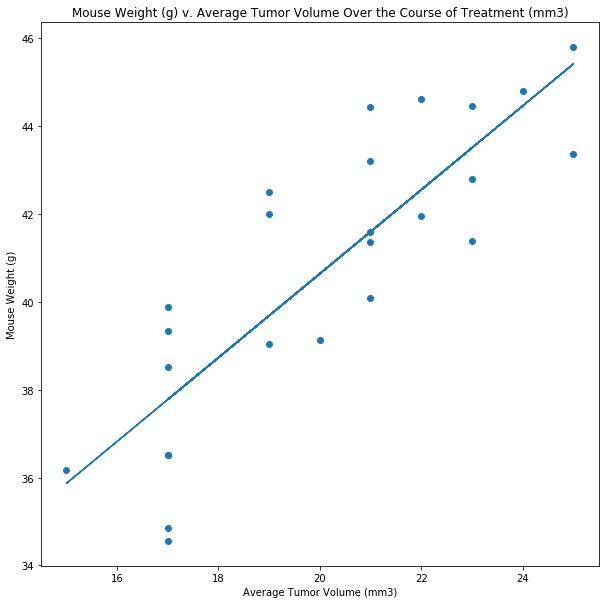

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen\
groupedDF = pd.DataFrame(mouse_df.loc[mouse_df["Drug Regimen"]=='Capomulin'].groupby("Mouse ID").mean()["Tumor Volume (mm3)"])
groupedDF.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'},inplace = True)
groupedDF["Average Weight (g)"] = mouse_df.loc[mouse_df["Drug Regimen"]=='Capomulin'].groupby("Mouse ID").mean()["Weight (g)"]

plt.figure(figsize=(10,10))
plt.title("Mouse Weight (g) v. Average Tumor Volume Over the Course of Treatment (mm3)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.scatter(x=groupedDF["Average Weight (g)"],y=groupedDF['Average Tumor Volume (mm3)'])

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(groupedDF["Average Weight (g)"], groupedDF["Average Tumor Volume (mm3)"])
lineq = slope*groupedDF["Average Weight (g)"] + intercept
print(f"Line EQ = {slope}*x + {intercept}\nPearson's Coefficient = {rvalue}")
plt.plot(groupedDF["Average Weight (g)"],lineq)

plt.show()
# plt.show()